## Context
My girlfriend's master's thesis was the `Perception of Anthropomorphic Traits in
Cars`. She wanted to create a questionaire to test this hypothesis.
<br />
She had acquired a dataset of images of cars, and after selecting the images
that could be used in the questionaire, she created a spreadsheet with the file name
and the features for each car, such as the size of the grille, the shape of the
headlights, etc.
<br />
She needed to select 10 images for the questionaire, and those images had to
be representative of the different classes of the various labels, e.g. `Bumper
Shape: upturned lower edge-straight upper edge` or `Headlights Position: only
upper`.


## Approach
I used [scikit-multilearn](http://scikit.ml/tutorial.html) to split the data into a
training and a test set that were representative of the different classes of
the various labels in the dataset, and exported the rows of the training set
containing the filename, to a CSV file.

Note: The data used in this notebook have been anonymized.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skmultilearn.model_selection import iterative_train_test_split

In [37]:
df = pd.read_csv('stimuli.csv')

In [38]:
df.columns

Index(['Filename', 'Car Size', 'Grille Size', 'Grille Shape', 'Bumper Shape',
       'Headlights Position', 'Headlights Shape',
       'Number of bulbs in each headlight', 'Bulb Shape'],
      dtype='object')

In [39]:
df

,Filename,Car Size,Grille Size,Grille Shape,Bumper Shape,Headlights Position,Headlights Shape,Number of bulbs in each headlight,Bulb Shape
0,21087_xg1063_772.jpg,normal,large,irregular,irregular,only upper,irregular,1,irregular
1,21372_xg1063_772.jpg,normal,large,irregular,rectangle,only upper,irregular,3 and over,irregular
2,25262_xg1063_772.jpg,normal,large,irregular,rectangle,only upper,irregular,3 and over,irregular
3,2515_xg1063_772.jpg,large,large,rectangle,rectangle,upper-lower,irregular,1,irregular
4,2710_xg1063_772.jpg,large,large,rectangle,rectangle,upper-lower,irregular,1,irregular
...,...,...,...,...,...,...,...,...,...
794,2964_xg1063_772.jpg,large,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,only upper,irregular,3 and over,square and irregular
795,2966_xg1063_772.jpg,large,large,lower edge upturned-upper edge straight,upturned lower edge-upturned upper edge,only upper,irregular,2,square and irregular
796,25556_xg1063_772.jpg,large,large,lower edge upturned-upper edge downturned,upturned lower edge-straight upper edge,only upper,rectangle,2,square and irregular
797,2508_xg1063_772.jpg,large,large,lower edge upturned-upper edge straight,other,only upper,rectangle,2,square and round


In [40]:
df.isna().sum()

Filename                             0
Car Size                             0
Grille Size                          0
Grille Shape                         0
Bumper Shape                         0
Headlights Position                  0
Headlights Shape                     0
Number of bulbs in each headlight    0
Bulb Shape                           0
dtype: int64

No nulls

In [41]:
# Change order of columns based on stakeholder feedback
features = [
        'Car Size',
        'Grille Size',
        'Grille Shape',
        'Bumper Shape',
        'Headlights Position',
        'Headlights Shape',
        'Number of bulbs in each headlight',
        'Bulb Shape'
        ]

Percentage of rows, grouped by feature.

In [42]:
def percentage_value_counts(df, feature):
    return (df[feature].value_counts().astype(float) / len(df) * 100).map(lambda x: f"{x:.1f}%")

In [43]:
for feature in features:
    print(percentage_value_counts(df, feature))
    print("\n")

Car Size
large     51.6%
normal    48.4%
Name: count, dtype: object


Grille Size
large            62.2%
small            34.5%
does not have     3.3%
Name: count, dtype: object


Grille Shape
lower edge upturned-upper edge straight      43.7%
lower edge upturned-upper edge downturned    17.5%
rectangle                                    15.9%
irregular                                     7.5%
lower straight-upper downturned               6.0%
lower and upper edge upturned                 4.1%
does not have                                 3.1%
trapezoid                                     1.1%
ορθογώνιο rounded edges                       0.6%
downturned upper-lower                        0.3%
oval                                          0.1%
Name: count, dtype: object


Bumper Shape
upturned lower edge-straight upper edge        30.8%
downturned upper edge-straight lower           23.5%
rectangle                                      18.1%
downturned upper edge-upturned lower edge    

In [44]:
sns.set_style('darkgrid')

In [45]:
def plot_bar(df, column):
    fig, ax = plt.subplots()

    sns.barplot(
            df[column].value_counts(),
            ax=ax,
            orient='h'
            )

    # make xlabel bold
    ax.set_xlabel(ax.get_xlabel(), fontweight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontweight='bold')
    ax.set_title(column, fontweight='bold', fontsize=15)

    plt.show()

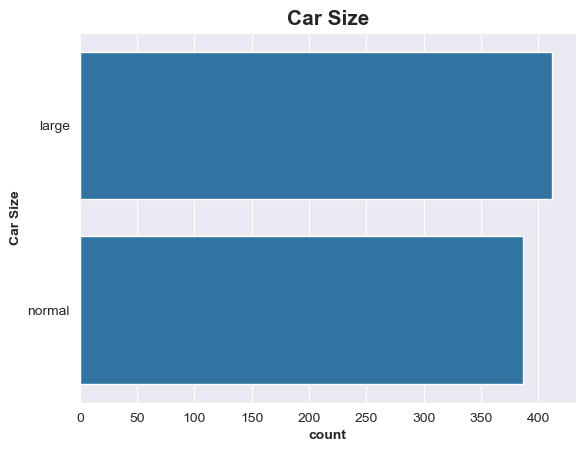

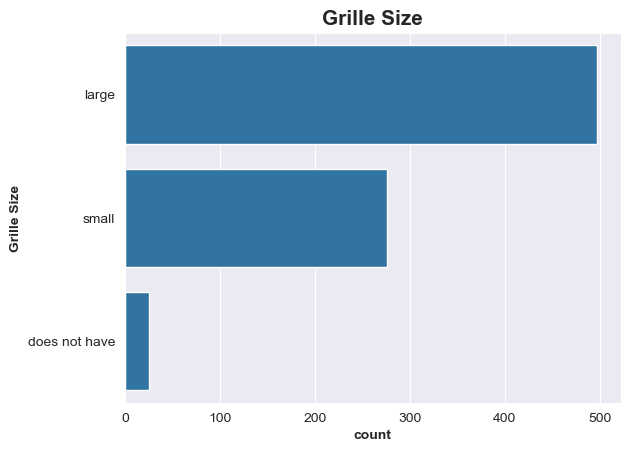

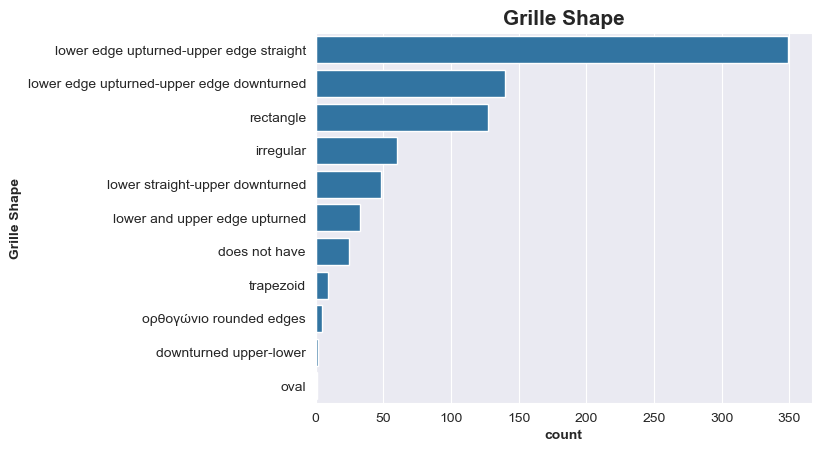

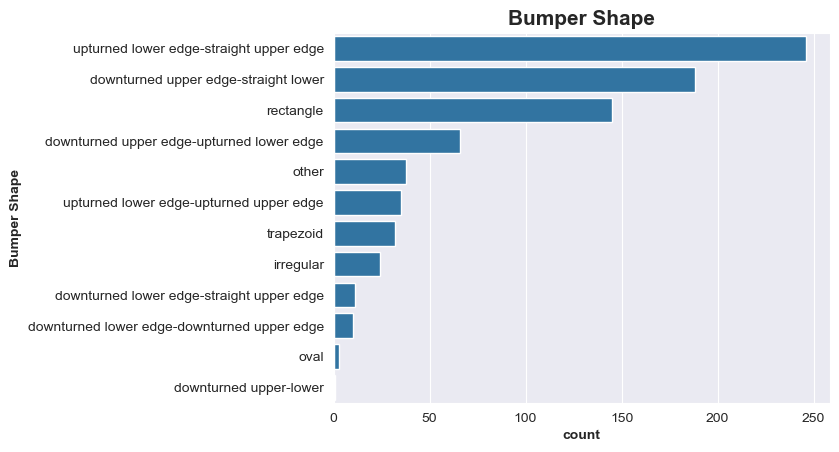

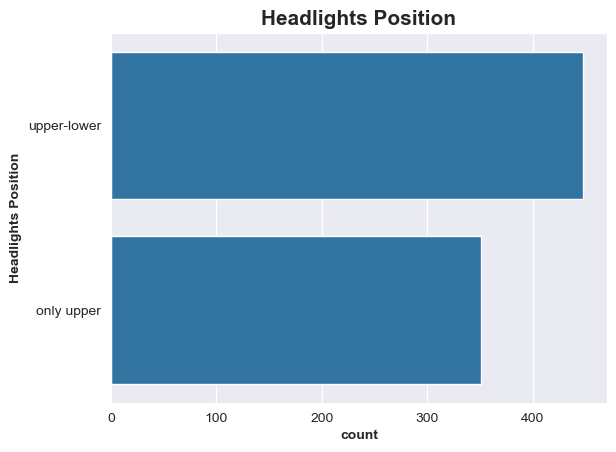

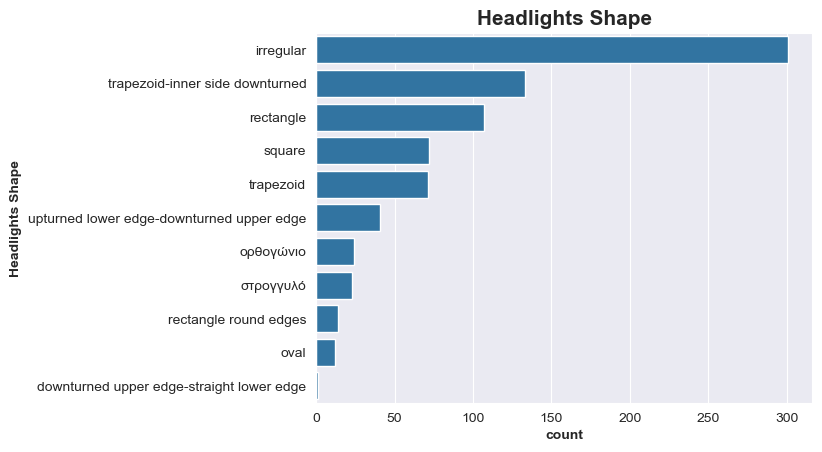

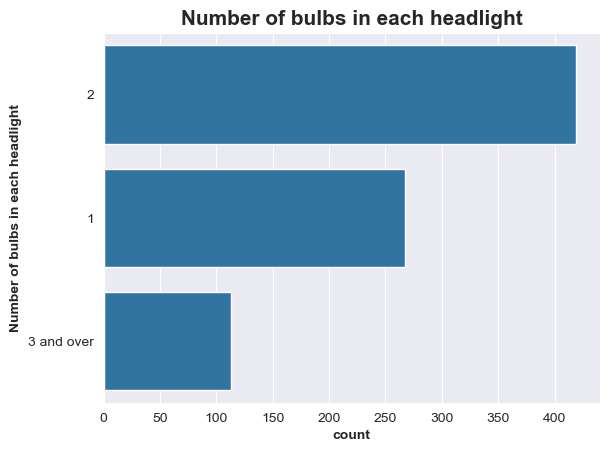

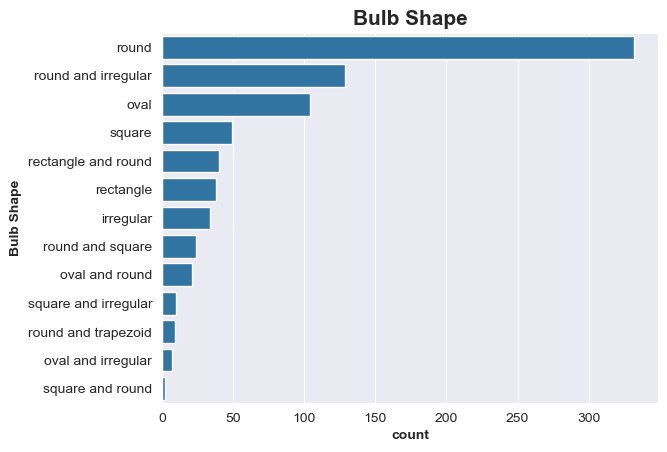

In [46]:
for column in features:
    plot_bar(df, column)

Applying filters according to the charts above and according to stakeholder feedback to simplify the stimuli for this iteration.

In [47]:
normal_df = df[
    (df['Car Size'] == 'normal') &
    (df['Grille Size'] != 'does not have') &
    (df['Grille Shape'].isin(['lower edge upturned-upper edge straight', 'lower edge upturned-upper edge downturned'])) &
    (df['Bumper Shape'].isin(['upturned lower edge-straight upper edge', 'downturned upper edge-straight lower'])) &
    (df['Headlights Shape'].isin(['irregular', 'trapezoid-inner side downturned'])) &
    (df['Number of bulbs in each headlight'] == '2') &
    (df['Bulb Shape'].isin(['round', 'round and irregular']))
]

We are left with the following number of pictures

In [48]:
len(normal_df)

61

In [49]:
for feature in features:
    print(normal_df[feature].value_counts())
    print("\n")

Car Size
normal    61
Name: count, dtype: int64


Grille Size
small    46
large    15
Name: count, dtype: int64


Grille Shape
lower edge upturned-upper edge straight      46
lower edge upturned-upper edge downturned    15
Name: count, dtype: int64


Bumper Shape
upturned lower edge-straight upper edge    42
downturned upper edge-straight lower       19
Name: count, dtype: int64


Headlights Position
upper-lower    38
only upper     23
Name: count, dtype: int64


Headlights Shape
irregular                          46
trapezoid-inner side downturned    15
Name: count, dtype: int64


Number of bulbs in each headlight
2    61
Name: count, dtype: int64


Bulb Shape
round                  39
round and irregular    22
Name: count, dtype: int64




In [50]:
normal_df

,Filename,Car Size,Grille Size,Grille Shape,Bumper Shape,Headlights Position,Headlights Shape,Number of bulbs in each headlight,Bulb Shape
275,21088_xg1063_772.jpg,normal,large,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,upper-lower,irregular,2,round
279,2932_xg1063_772.jpg,normal,small,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,upper-lower,irregular,2,round
280,2960_xg1063_772.jpg,normal,small,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,only upper,irregular,2,round
289,2789_xg1063_772.jpg,normal,large,lower edge upturned-upper edge straight,downturned upper edge-straight lower,only upper,irregular,2,round
293,2706_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,downturned upper edge-straight lower,upper-lower,irregular,2,round
...,...,...,...,...,...,...,...,...,...
630,2801_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,only upper,irregular,2,round and irregular
631,2739_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round and irregular
682,2786_xg1063_772.jpg,normal,large,lower edge upturned-upper edge straight,downturned upper edge-straight lower,upper-lower,trapezoid-inner side downturned,2,round and irregular
689,2509_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,trapezoid-inner side downturned,2,round and irregular


In [51]:
nunique = normal_df.nunique()
nunique

Filename                             60
Car Size                              1
Grille Size                           2
Grille Shape                          2
Bumper Shape                          2
Headlights Position                   2
Headlights Shape                      2
Number of bulbs in each headlight     1
Bulb Shape                            2
dtype: int64

In [52]:
normal_df

,Filename,Car Size,Grille Size,Grille Shape,Bumper Shape,Headlights Position,Headlights Shape,Number of bulbs in each headlight,Bulb Shape
275,21088_xg1063_772.jpg,normal,large,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,upper-lower,irregular,2,round
279,2932_xg1063_772.jpg,normal,small,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,upper-lower,irregular,2,round
280,2960_xg1063_772.jpg,normal,small,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,only upper,irregular,2,round
289,2789_xg1063_772.jpg,normal,large,lower edge upturned-upper edge straight,downturned upper edge-straight lower,only upper,irregular,2,round
293,2706_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,downturned upper edge-straight lower,upper-lower,irregular,2,round
...,...,...,...,...,...,...,...,...,...
630,2801_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,only upper,irregular,2,round and irregular
631,2739_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round and irregular
682,2786_xg1063_772.jpg,normal,large,lower edge upturned-upper edge straight,downturned upper edge-straight lower,upper-lower,trapezoid-inner side downturned,2,round and irregular
689,2509_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,trapezoid-inner side downturned,2,round and irregular


In [53]:
df

,Filename,Car Size,Grille Size,Grille Shape,Bumper Shape,Headlights Position,Headlights Shape,Number of bulbs in each headlight,Bulb Shape
0,21087_xg1063_772.jpg,normal,large,irregular,irregular,only upper,irregular,1,irregular
1,21372_xg1063_772.jpg,normal,large,irregular,rectangle,only upper,irregular,3 and over,irregular
2,25262_xg1063_772.jpg,normal,large,irregular,rectangle,only upper,irregular,3 and over,irregular
3,2515_xg1063_772.jpg,large,large,rectangle,rectangle,upper-lower,irregular,1,irregular
4,2710_xg1063_772.jpg,large,large,rectangle,rectangle,upper-lower,irregular,1,irregular
...,...,...,...,...,...,...,...,...,...
794,2964_xg1063_772.jpg,large,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,only upper,irregular,3 and over,square and irregular
795,2966_xg1063_772.jpg,large,large,lower edge upturned-upper edge straight,upturned lower edge-upturned upper edge,only upper,irregular,2,square and irregular
796,25556_xg1063_772.jpg,large,large,lower edge upturned-upper edge downturned,upturned lower edge-straight upper edge,only upper,rectangle,2,square and irregular
797,2508_xg1063_772.jpg,large,large,lower edge upturned-upper edge straight,other,only upper,rectangle,2,square and round


Decided to drop bulb shape and headlights shape as features to reduce complexity.

In [54]:
to_drop = ['Filename', 'Bulb Shape', 'Headlights Shape']

In [55]:
final_features = [x for x in features if x not in to_drop]

In [56]:
dummy_df = pd.get_dummies(normal_df.drop(to_drop, axis=1), columns=final_features)

In [57]:
num_of_images = len(normal_df)
num_of_images

61

In [58]:
# Using a dummy X variable, we are only interested in the indices
# of the selected rows
X = np.zeros((num_of_images, 1))
y = dummy_df.to_numpy()

In [59]:
number_of_images_for_questionaire = 10

In [60]:
test_size = round(1 - number_of_images_for_questionaire * 1.0 / num_of_images, 2)
test_size

0.84

In [61]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=test_size)

In [62]:
y_train

array([[ True, False,  True,  True, False,  True, False,  True, False,
         True],
       [ True,  True, False, False,  True,  True, False,  True, False,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
         True],
       [ True, False,  True, False,  True, False,  True,  True, False,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
         True],
       [ True,  True, False,  True, False,  True, False,  True, False,
         True],
       [ True, False,  True, False,  True, False,  True, False,  True,
         True]])

Let's find the rows of the train set and verify that all classes of all labels are represented. 

In [63]:
df.duplicated().sum()

0

No duplicates, we can use equality to find the indices of the selected rows.

In [64]:
indices = []

for y_values in y_train:
    for index, data in dummy_df.iterrows():
        if np.array_equal(data.to_numpy(), y_values):
            indices.append(index)
            break

In [65]:
indices

[280, 289, 337, 340, 337, 337, 337, 337, 503, 337]

In [66]:
normal_df.loc[indices]

,Filename,Car Size,Grille Size,Grille Shape,Bumper Shape,Headlights Position,Headlights Shape,Number of bulbs in each headlight,Bulb Shape
280,2960_xg1063_772.jpg,normal,small,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,only upper,irregular,2,round
289,2789_xg1063_772.jpg,normal,large,lower edge upturned-upper edge straight,downturned upper edge-straight lower,only upper,irregular,2,round
337,2539_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round
340,2600_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,only upper,irregular,2,round
337,2539_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round
337,2539_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round
337,2539_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round
337,2539_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round
503,2898_xg1063_772.jpg,normal,large,lower edge upturned-upper edge downturned,downturned upper edge-straight lower,only upper,trapezoid-inner side downturned,2,round
337,2539_xg1063_772.jpg,normal,small,lower edge upturned-upper edge straight,upturned lower edge-straight upper edge,upper-lower,irregular,2,round


In [67]:
normal_df[final_features].nunique()

Car Size                             1
Grille Size                          2
Grille Shape                         2
Bumper Shape                         2
Headlights Position                  2
Number of bulbs in each headlight    1
dtype: int64

In [68]:
unique_counts = normal_df[final_features].nunique()
columns_with_only_one_value = list(unique_counts[unique_counts == 1].index)

In [69]:
for feature in set(final_features) - set(columns_with_only_one_value):
    print(normal_df.loc[indices][feature].value_counts(dropna=False))
    print("\n")

Bumper Shape
upturned lower edge-straight upper edge    7
downturned upper edge-straight lower       3
Name: count, dtype: int64


Headlights Position
upper-lower    6
only upper     4
Name: count, dtype: int64


Grille Size
small    8
large    2
Name: count, dtype: int64


Grille Shape
lower edge upturned-upper edge straight      8
lower edge upturned-upper edge downturned    2
Name: count, dtype: int64




Here are the images that will go into the questionaire.

In [70]:
list(normal_df.loc[indices]['Filename'])

['2960_xg1063_772.jpg',
 '2789_xg1063_772.jpg',
 '2539_xg1063_772.jpg',
 '2600_xg1063_772.jpg',
 '2539_xg1063_772.jpg',
 '2539_xg1063_772.jpg',
 '2539_xg1063_772.jpg',
 '2539_xg1063_772.jpg',
 '2898_xg1063_772.jpg',
 '2539_xg1063_772.jpg']

### Next steps
 1. The classes attributed to each image were attributed by a single human. We could iterate on that and have multiple people classify these images to avoid bias.
 2. We could create multiple questionaires isolating different labels, to
 better measure the effect of each label class on the human perception of the car.